# Batch Size

In [11]:
import csv

def open_contents(dataset, net, optimizer, cycle, decay, lr, batch_size):
    
    with open(dataset + '/' + net + '/' + optimizer + '/' + cycle + '/' + decay + '/' + lr + '/' + batch_size + '/train_loss') as f:
        train_loss_helper = []
        for row in csv.reader(f):
            train_loss_helper.append(row)
    with open(dataset + '/' + net + '/' + optimizer + '/' + cycle + '/' + decay + '/' + lr + '/' + batch_size + '/val_loss') as f:
        val_loss_helper = []
        for row in csv.reader(f):
            val_loss_helper.append(row)
    with open(dataset + '/' + net + '/' + optimizer + '/' + cycle + '/' + decay + '/' + lr + '/' + batch_size + '/val_accuracy') as f:
        val_accuracy_helper = []
        for row in csv.reader(f):
            val_accuracy_helper.append(row)
    with open(dataset + '/' + net + '/' + optimizer + '/' + cycle + '/' + decay + '/' + lr + '/' + batch_size + '/lr_history') as f:
        lr_history_helper = []
        for row in csv.reader(f):
            lr_history_helper.append(row)
            
    train_loss = list(map(float, train_loss_helper[0]))
    val_loss = list(map(float, val_loss_helper[0]))
    val_accuracy = list(map(float, val_accuracy_helper[0]))
    try:
        lr_history = list(map(float, lr_history_helper[0]))
    except ValueError:
        lr_history = []
        
    return train_loss, val_loss, val_accuracy, lr_history

## Test batch sizes

In [12]:
dataset = 'CIFAR10'
#dataset = 'CIFAR100'

net = 'ResNet18'

optimizer = 'SGD'
#optimizer = 'Adam'
#optimizer = 'AdaSecant'

cycle = 'constantLR'
#cycle = '100-cycle'
#cycle = '50-cycle'
#cycle = '25-cycle'

decay = 'exponentialDecay=False'
#decay = 'exponentialDecay=True'
#decay = 'exponentialDecay=maxLR'
#decay = 'exponentialDecay=slope'

#lr = 'lr=0.001'
lr = 'lr=0.01'
#lr = 'lr=0.1'
#lr = 'lr=1'
#lr = 'lr=3'
#lr = 'lr=0.01-0.1'
#lr = 'lr=0.01-3'
#lr = 'lr=0.001-0.01'
#lr = 'lr=0.001-0.1'
#lr = 'lr=0.001-1'

batch_size1 = 'batch-size=32'
batch_size2 = 'batch-size=128'
batch_size3 = 'batch-size=512'
batch_size4 = 'batch-size=2048'

train_loss32, val_loss32, val_accuracy32, _ = open_contents(dataset, net, optimizer, cycle, decay, lr, batch_size1)
train_loss128, val_loss128, val_accuracy128, _ = open_contents(dataset, net, optimizer, cycle, decay, lr, batch_size2)
train_loss512, val_loss512, val_accuracy512, _ = open_contents(dataset, net, optimizer, cycle, decay, lr, batch_size3)
train_loss2048, val_loss2048, val_accuracy2048, _ = open_contents(dataset, net, optimizer, cycle, decay, lr, batch_size4)

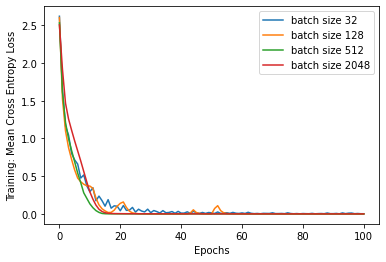

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_loss32, label='batch size 32')
plt.plot(train_loss128, label='batch size 128')
plt.plot(train_loss512, label='batch size 512')
plt.plot(train_loss2048, label='batch size 2048')
plt.xlabel('Epochs')
plt.ylabel('Training: Mean Cross Entropy Loss')
plt.legend()

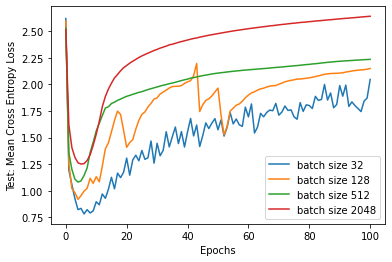

In [16]:
plt.plot(val_loss32, label='batch size 32')
plt.plot(val_loss128, label='batch size 128')
plt.plot(val_loss512, label='batch size 512')
plt.plot(val_loss2048, label='batch size 2048')
plt.xlabel('Epochs')
plt.ylabel('Test: Mean Cross Entropy Loss')
plt.legend()

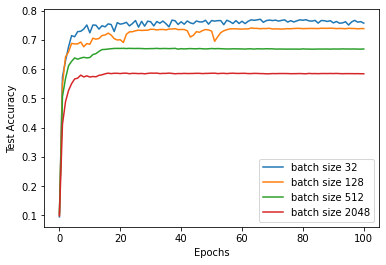

In [17]:
plt.plot(val_accuracy32, label='batch size 32')
plt.plot(val_accuracy128, label='batch size 128')
plt.plot(val_accuracy512, label='batch size 512')
plt.plot(val_accuracy2048, label='batch size 2048')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()